###  Supervised Learning
1.Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 


In [9]:
df = pd.read_csv('SOCR-HeightWeight.csv')

In [10]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [13]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [ ]:
df.drop('Index' , axis = 1 , inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


Text(0, 0.5, 'Height')

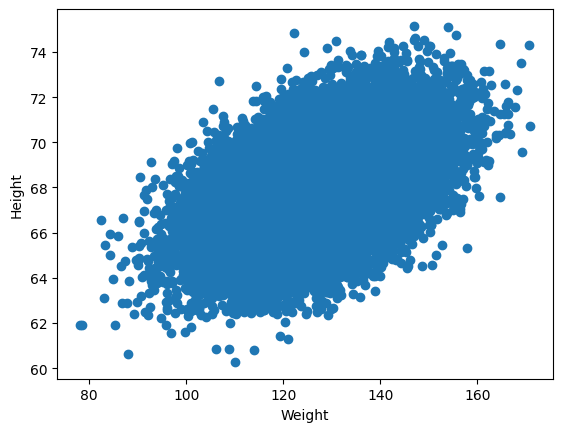

In [25]:
## Scatter plot

plt.scatter(df['Weight(Pounds)'],df['Height(Inches)'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [26]:
df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


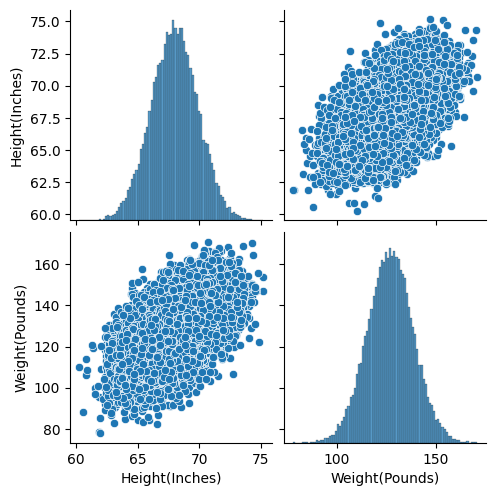

In [28]:
## Seaborn visualization

import seaborn as sns
sns.pairplot(df)


In [35]:
## independent and dependent features

X = df[['Weight(Pounds)']]     ## Independent in train (datadrame or 2d array)  
y = df['Height(Inches)']   ## This variable can be seriees or 1d array


In [36]:
X_series = df['Weight(Pounds)']
np.array(X_series).shape

(25000,)

In [37]:
np.array(y).shape

(25000,)

In [38]:
## Train  Test Split 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [40]:
X_train.shape

(18750, 1)

In [41]:
## Standardize 

from sklearn.preprocessing import StandardScaler


In [44]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)

In [45]:
## for train - fit_transform
## for test - transform (not to be shown)

X_test = scaler.transform(X_test)

In [46]:
X_test

array([[ 0.62053543],
       [-1.29869704],
       [ 0.76685832],
       ...,
       [ 0.73940988],
       [-1.16790419],
       [ 0.00246396]])

In [47]:
## Apply for LR 

from sklearn.linear_model import LinearRegression



In [51]:
regression = LinearRegression(n_jobs=-1)

In [52]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [55]:
print("Coefficient or slope : " ,regression.coef_)
print("Intercept : " ,regression.intercept_)

Coefficient or slope :  [0.94883892]
Intercept :  67.9938252704


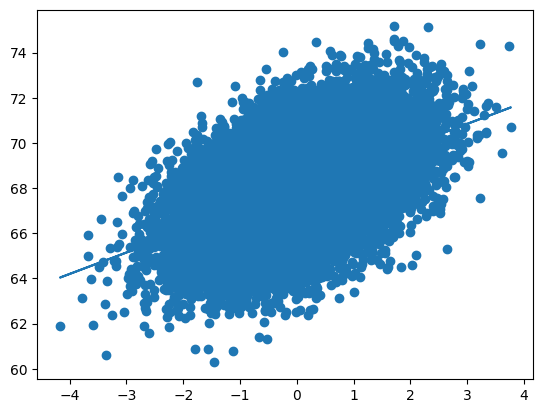

In [57]:
## plot train dataset best fit line


plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

##### prediction of test data

###### 1.predicated height output = intercept + coef_(Weights)
###### 2.y_pred_test = 156.470 + 17.29(X_test)

In [58]:
## Prediction For test data

y_pred = regression.predict(X_test)

In [59]:
## Performance metrics 


from sklearn.metrics import mean_squared_error ,mean_absolute_error

In [60]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse  = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.7333807993730996
1.3166150322297803
1.6532939240719116


In [61]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.2592643941428425


In [62]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.25914583850810224

In [65]:
pip install statsmodels

  Using cached statsmodels-0.14.4-cp313-cp313-win_amd64.whl.metadata (9.5 kB)
Using cached statsmodels-0.14.4-cp313-cp313-win_amd64.whl (9.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [66]:
import statsmodels.api as sm

In [67]:
model = sm.OLS(y_train,X_train).fit()

In [69]:
prediction =model.predict(X_test)
print(prediction)

[ 0.58878817 -1.2322543   0.72762503 ...  0.70158088 -1.10815295
  0.0023379 ]


In [70]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         Height(Inches)   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.649
Date:                Thu, 05 Dec 2024   Prob (F-statistic):                      0.0561
Time:                        12:47:13   Log-Likelihood:                     -1.0572e+05
No. Observations:               18750   AIC:                                  2.115e+05
Df Residuals:                   18749   BIC:                                  2.115e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [71]:
## Prediction for new data

regression.predict(scaler.transform([[72]]))

c:\Users\Lenovo\OneDrive\Documents\GitHub\Data-Science-Course\environment\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([63.50061832])